In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("players_seasonal_stats_selenium.csv")

In [4]:
df.shape

(5880, 37)

In [5]:
df.columns

Index(['Player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

Magyarázat: a ".1" attribútumok az a "per 90 minutes" mutatók

In [6]:
df.head(2)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,Max Aarons,2017-2018,17,Norwich City,eng ENG,Jr. PL2 — Div. 2,7th,15,15.0,"1,319",...,0.07,0.07,0.00,0.07,NaN,NaN,NaN,NaN,NaN,Matches
1,Max Aarons,2018-2019,18,Norwich City,eng ENG,2. Championship,1st,41,41.0,"3,664",...,0.15,0.20,0.05,0.20,0.06,0.11,0.18,0.06,0.18,Matches


In [7]:
df = df.drop(columns=['Matches'])

In [8]:
duplicate_counts = df.duplicated(subset=["Player", "Season"], keep=False)

In [9]:
players_changed_teams = df[duplicate_counts]["Player"].nunique()

In [10]:
players_changed_teams

441

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.head(2)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Max Aarons,2017-2018,17,Norwich City,eng ENG,Jr. PL2 — Div. 2,7th,15,15.0,"1,319",...,0.00,0.07,0.07,0.00,0.07,NaN,NaN,NaN,NaN,NaN
1,Max Aarons,2018-2019,18,Norwich City,eng ENG,2. Championship,1st,41,41.0,"3,664",...,0.05,0.15,0.20,0.05,0.20,0.06,0.11,0.18,0.06,0.18


In [13]:
nan_stats = pd.DataFrame({
    "Total NaN": df.isnull().sum(),
    "Percentage NaN": (df.isnull().sum() / len(df)) * 100,
    "Total Not NaN": df.notnull().sum(),
    "Percentage Not NaN": (df.notnull().sum() / len(df)) * 100
})

nan_stats

,Total NaN,Percentage NaN,Total Not NaN,Percentage Not NaN
Player,0,0.000000,5880,100.000000
Season,0,0.000000,5880,100.000000
Age,0,0.000000,5880,100.000000
Squad,0,0.000000,5880,100.000000
Country,0,0.000000,5880,100.000000
Comp,0,0.000000,5880,100.000000
LgRank,50,0.850340,5830,99.149660
MP,0,0.000000,5880,100.000000
Starts,4,0.068027,5876,99.931973
Min,244,4.149660,5636,95.850340


In [14]:
threshold = 45
cols_to_drop = nan_stats[nan_stats["Percentage NaN"] > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

In [15]:
df.columns

Index(['Player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK'],
      dtype='object')

In [16]:
numeric_columns = ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK']

In [17]:
non_numeric_columns = [col for col in df.columns if col not in numeric_columns and col not in ["Player", "Season"]]

In [18]:
non_numeric_columns

['Age', 'Squad', 'Country', 'Comp', 'LgRank']

In [19]:
numeric_columns = [col for col in numeric_columns if col in df.columns]

In [20]:
df = df.sort_index()

In [21]:
merged_df = df.groupby(["Player", "Season"]).agg({
    **{col: 'sum' for col in numeric_columns},  # Sum numeric stats
    **{col: 'last' for col in non_numeric_columns},    # Keep latest non-numeric values
}).reset_index()

In [22]:
merged_df.shape

(4705, 24)

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
merged_df.head(2)

,Player,Season,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Age,Squad,Country,Comp,LgRank
0,Aaron Cresswell,2008-2009,13,8.0,824,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.0,0.11,0.11,0.11,18,Tranmere Rovers,eng ENG,3. League One,7th
1,Aaron Cresswell,2009-2010,14,13.0,"1,206",13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.00,0.00,0.00,19,Tranmere Rovers,eng ENG,3. League One,19th


In [25]:
df.describe()

,Age,MP,Starts,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK
count,5880.000000,5880.000000,5876.000000,5636.000000,5632.000000,5591.000000,5591.000000,5628.000000,5628.000000,5628.000000,5633.000000,5632.000000,5632.000000,5591.000000,5591.000000,5628.000000,5588.000000
mean,22.118027,18.878231,15.391082,15.958747,2.399858,1.661599,4.056877,2.237385,0.162580,0.200249,2.545535,0.112038,0.150458,0.103654,0.252881,0.142088,0.244529
std,4.055536,12.748545,12.410012,11.873337,3.924196,2.470135,5.708512,3.575603,0.714947,0.826447,2.669621,0.363565,0.300854,0.239427,0.408185,0.291623,0.399755
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,7.000000,3.000000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,19.000000,14.000000,14.800000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.050000,0.040000,0.140000,0.050000,0.130000
75%,25.000000,30.000000,25.000000,25.225000,3.000000,2.000000,6.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.210000,0.150000,0.380000,0.200000,0.370000
max,39.000000,46.000000,46.000000,46.000000,36.000000,20.000000,44.000000,31.000000,9.000000,10.000000,16.000000,4.000000,12.860000,11.250000,12.860000,12.860000,12.860000


In [26]:
df['Season'] = df['Season'].astype('category')

In [27]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [28]:
stat_columns = ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 
                'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK']

In [29]:
for col in stat_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [30]:
df['Country'] = df['Country'].astype('category')
df['Squad'] = df['Squad'].astype('category')
df['Comp'] = df['Comp'].astype('category')

In [31]:
df = df.sort_values(by=['Player', 'Season'])

In [32]:
def add_goals_next_season(df):
    df['Goals_next_season'] = df.groupby('Player')['Gls'].shift(-1)
    return df

In [33]:
df = add_goals_next_season(df)

In [34]:
df = df[df['MP'] != 0]

In [35]:
df.head(20)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,0.0
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,NaN,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,4.0
1164,Aaron Cresswell,2010-2011,20,Tranmere Rovers,eng ENG,3. League One,17th,43,42.0,NaN,41.4,4.0,4.0,8.0,4.0,0.0,0.0,4.0,0.0,0.10,0.10,0.19,0.10,0.19,1.0
1165,Aaron Cresswell,2011-2012,21,Ipswich Town,eng ENG,2. Championship,15th,44,44.0,NaN,43.7,1.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,0.02,0.11,0.14,0.02,0.14,3.0
1166,Aaron Cresswell,2012-2013,22,Ipswich Town,eng ENG,2. Championship,14th,46,46.0,NaN,46.0,3.0,5.0,8.0,3.0,0.0,0.0,2.0,0.0,0.07,0.11,0.17,0.07,0.17,2.0
1167,Aaron Cresswell,2013-2014,23,Ipswich Town,eng ENG,2. Championship,9th,42,42.0,NaN,41.6,2.0,13.0,15.0,2.0,0.0,0.0,2.0,1.0,0.05,0.31,0.36,0.05,0.36,2.0
1168,Aaron Cresswell,2014-2015,24,West Ham,eng ENG,1. Premier League,12th,38,38.0,NaN,38.0,2.0,4.0,6.0,2.0,0.0,0.0,5.0,0.0,0.05,0.11,0.16,0.05,0.16,2.0
1169,Aaron Cresswell,2015-2016,25,West Ham,eng ENG,1. Premier League,7th,37,37.0,NaN,36.8,2.0,4.0,6.0,2.0,0.0,0.0,1.0,0.0,0.05,0.11,0.16,0.05,0.16,0.0
1170,Aaron Cresswell,2016-2017,26,West Ham,eng ENG,1. Premier League,11th,26,24.0,NaN,23.5,0.0,2.0,2.0,0.0,0.0,0.0,4.0,2.0,0.00,0.09,0.09,0.00,0.09,1.0
1171,Aaron Cresswell,2017-2018,27,West Ham,eng ENG,1. Premier League,13th,36,35.0,NaN,34.1,1.0,3.0,4.0,1.0,0.0,0.0,7.0,0.0,0.03,0.09,0.12,0.03,0.12,0.0


In [36]:
df.shape

(5636, 25)

In [37]:
df = df.dropna(subset=['Goals_next_season'])

In [38]:
df.shape

(4942, 25)

In [39]:
def extract_numeric_column(df, column_name):
    new_column = f"{column_name}_numerical"
    df[new_column] = df[column_name].astype(str).str.extract(r'(\d+)').astype(float)

In [40]:
extract_numeric_column(df, "LgRank")

In [41]:
df.head(5)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,0.0,7.0
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,NaN,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,4.0,19.0
1164,Aaron Cresswell,2010-2011,20,Tranmere Rovers,eng ENG,3. League One,17th,43,42.0,NaN,41.4,4.0,4.0,8.0,4.0,0.0,0.0,4.0,0.0,0.10,0.10,0.19,0.10,0.19,1.0,17.0
1165,Aaron Cresswell,2011-2012,21,Ipswich Town,eng ENG,2. Championship,15th,44,44.0,NaN,43.7,1.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,0.02,0.11,0.14,0.02,0.14,3.0,15.0
1166,Aaron Cresswell,2012-2013,22,Ipswich Town,eng ENG,2. Championship,14th,46,46.0,NaN,46.0,3.0,5.0,8.0,3.0,0.0,0.0,2.0,0.0,0.07,0.11,0.17,0.07,0.17,2.0,14.0


In [42]:
extract_numeric_column(df, "Comp")

In [43]:
df.head(5)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,0.0,7.0,3.0
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,NaN,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,4.0,19.0,3.0
1164,Aaron Cresswell,2010-2011,20,Tranmere Rovers,eng ENG,3. League One,17th,43,42.0,NaN,41.4,4.0,4.0,8.0,4.0,0.0,0.0,4.0,0.0,0.10,0.10,0.19,0.10,0.19,1.0,17.0,3.0
1165,Aaron Cresswell,2011-2012,21,Ipswich Town,eng ENG,2. Championship,15th,44,44.0,NaN,43.7,1.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,0.02,0.11,0.14,0.02,0.14,3.0,15.0,2.0
1166,Aaron Cresswell,2012-2013,22,Ipswich Town,eng ENG,2. Championship,14th,46,46.0,NaN,46.0,3.0,5.0,8.0,3.0,0.0,0.0,2.0,0.0,0.07,0.11,0.17,0.07,0.17,2.0,14.0,2.0


In [44]:
extract_numeric_column(df, "Season")

In [45]:
df.head(5)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical,Season_numerical
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,0.0,7.0,3.0,2008.0
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,NaN,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,4.0,19.0,3.0,2009.0
1164,Aaron Cresswell,2010-2011,20,Tranmere Rovers,eng ENG,3. League One,17th,43,42.0,NaN,41.4,4.0,4.0,8.0,4.0,0.0,0.0,4.0,0.0,0.10,0.10,0.19,0.10,0.19,1.0,17.0,3.0,2010.0
1165,Aaron Cresswell,2011-2012,21,Ipswich Town,eng ENG,2. Championship,15th,44,44.0,NaN,43.7,1.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,0.02,0.11,0.14,0.02,0.14,3.0,15.0,2.0,2011.0
1166,Aaron Cresswell,2012-2013,22,Ipswich Town,eng ENG,2. Championship,14th,46,46.0,NaN,46.0,3.0,5.0,8.0,3.0,0.0,0.0,2.0,0.0,0.07,0.11,0.17,0.07,0.17,2.0,14.0,2.0,2012.0


In [46]:
df = df.fillna(df.median(numeric_only=True))

In [47]:
df.head(5)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical,Season_numerical
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,0.0,7.0,3.0,2008.0
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,294.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,4.0,19.0,3.0,2009.0
1164,Aaron Cresswell,2010-2011,20,Tranmere Rovers,eng ENG,3. League One,17th,43,42.0,294.0,41.4,4.0,4.0,8.0,4.0,0.0,0.0,4.0,0.0,0.10,0.10,0.19,0.10,0.19,1.0,17.0,3.0,2010.0
1165,Aaron Cresswell,2011-2012,21,Ipswich Town,eng ENG,2. Championship,15th,44,44.0,294.0,43.7,1.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,0.02,0.11,0.14,0.02,0.14,3.0,15.0,2.0,2011.0
1166,Aaron Cresswell,2012-2013,22,Ipswich Town,eng ENG,2. Championship,14th,46,46.0,294.0,46.0,3.0,5.0,8.0,3.0,0.0,0.0,2.0,0.0,0.07,0.11,0.17,0.07,0.17,2.0,14.0,2.0,2012.0


In [48]:
df['age_bucket'] = pd.cut(df['Age'], bins=[16, 22, 27, 32, 40], labels=['Young', 'Peak', 'Veteran', 'Old'])
df = pd.get_dummies(df, columns=['age_bucket'], drop_first=True, dtype=int)

In [49]:
df.head(10)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical,Season_numerical,age_bucket_Peak,age_bucket_Veteran,age_bucket_Old
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11,0.0,7.0,3.0,2008.0,0,0,0
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,294.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,4.0,19.0,3.0,2009.0,0,0,0
1164,Aaron Cresswell,2010-2011,20,Tranmere Rovers,eng ENG,3. League One,17th,43,42.0,294.0,41.4,4.0,4.0,8.0,4.0,0.0,0.0,4.0,0.0,0.10,0.10,0.19,0.10,0.19,1.0,17.0,3.0,2010.0,0,0,0
1165,Aaron Cresswell,2011-2012,21,Ipswich Town,eng ENG,2. Championship,15th,44,44.0,294.0,43.7,1.0,5.0,6.0,1.0,0.0,0.0,2.0,1.0,0.02,0.11,0.14,0.02,0.14,3.0,15.0,2.0,2011.0,0,0,0
1166,Aaron Cresswell,2012-2013,22,Ipswich Town,eng ENG,2. Championship,14th,46,46.0,294.0,46.0,3.0,5.0,8.0,3.0,0.0,0.0,2.0,0.0,0.07,0.11,0.17,0.07,0.17,2.0,14.0,2.0,2012.0,0,0,0
1167,Aaron Cresswell,2013-2014,23,Ipswich Town,eng ENG,2. Championship,9th,42,42.0,294.0,41.6,2.0,13.0,15.0,2.0,0.0,0.0,2.0,1.0,0.05,0.31,0.36,0.05,0.36,2.0,9.0,2.0,2013.0,1,0,0
1168,Aaron Cresswell,2014-2015,24,West Ham,eng ENG,1. Premier League,12th,38,38.0,294.0,38.0,2.0,4.0,6.0,2.0,0.0,0.0,5.0,0.0,0.05,0.11,0.16,0.05,0.16,2.0,12.0,1.0,2014.0,1,0,0
1169,Aaron Cresswell,2015-2016,25,West Ham,eng ENG,1. Premier League,7th,37,37.0,294.0,36.8,2.0,4.0,6.0,2.0,0.0,0.0,1.0,0.0,0.05,0.11,0.16,0.05,0.16,0.0,7.0,1.0,2015.0,1,0,0
1170,Aaron Cresswell,2016-2017,26,West Ham,eng ENG,1. Premier League,11th,26,24.0,294.0,23.5,0.0,2.0,2.0,0.0,0.0,0.0,4.0,2.0,0.00,0.09,0.09,0.00,0.09,1.0,11.0,1.0,2016.0,1,0,0
1171,Aaron Cresswell,2017-2018,27,West Ham,eng ENG,1. Premier League,13th,36,35.0,294.0,34.1,1.0,3.0,4.0,1.0,0.0,0.0,7.0,0.0,0.03,0.09,0.12,0.03,0.12,0.0,13.0,1.0,2017.0,1,0,0


In [50]:
df['age_times_minutes'] = df['Age'] * df['Min']
df['goals_assists_sum'] = df['Gls'] + df['Ast']

In [51]:
df['minutes_per_game'] = df['Min'] / df['MP']
df['goals_per_90'] = (df['Gls'] / df['Min']) * 90

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop(columns=['Goals_next_season', 'Player' ,'Season', 'Squad', 'Country', 'Comp', 'LgRank'])
y = df['Goals_next_season']

In [54]:
X.shape

(4942, 28)

In [55]:
X = X.select_dtypes(include=['number'])

In [56]:
X.shape

(4942, 28)

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [60]:
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    mean_absolute_percentage_error,
    max_error,
    explained_variance_score
)
import numpy as np

In [62]:
y_pred = model_random_forest.predict(X_val)

In [63]:
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

In [64]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 2.32
RMSE: 3.54
R²: 0.23


In [65]:
import xgboost as xgb
from xgboost import XGBRegressor

In [66]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [67]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [68]:
y_pred_2 = model.predict(X_val)

In [69]:
print("MAE:", mean_absolute_error(y_val, y_pred_2))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_2)))
print("R²:", r2_score(y_val, y_pred_2))

MAE: 2.310994008712916
RMSE: 3.6058131144136754
R²: 0.20333210652921063


In [70]:
import matplotlib.pyplot as plt

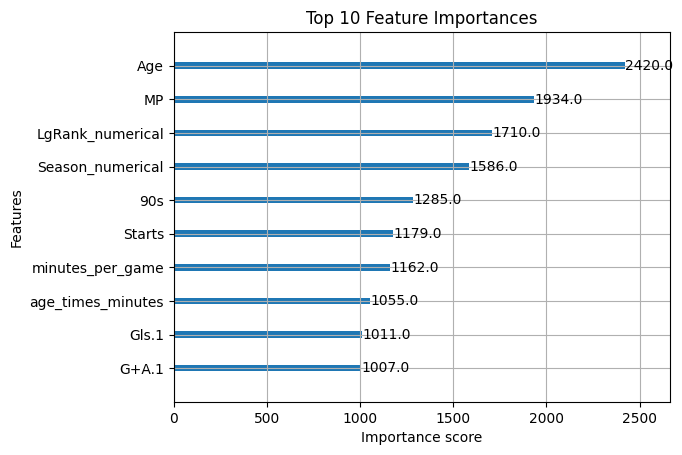

In [71]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3, 5]
}

In [74]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 300, 500], 'subsample': [0.8]},
             scoring='neg_mean_absolute_error', verbose=1)

In [75]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Neg MAE):", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score (Neg MAE): -2.1375361385324503


In [76]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

In [77]:
print("Validation MAE:", mean_absolute_error(y_val, y_pred))
print("Validation R²:", r2_score(y_val, y_pred))

Validation MAE: 2.2391396575542384
Validation R²: 0.2720179627950523


In [80]:
avg_goal = df['Goals_next_season'].mean()
print(avg_goal)

2.5548360987454473


In [81]:
df['avg_goals_per_player'] = df.groupby('Player')['Gls'].transform('mean')

In [82]:
df.head(2)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical,Season_numerical,age_bucket_Peak,age_bucket_Veteran,age_bucket_Old,age_times_minutes,goals_assists_sum,minutes_per_game,goals_per_90,avg_goals_per_player
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.0,0.11,0.11,0.11,0.0,7.0,3.0,2008.0,0,0,0,14832.0,1.0,63.384615,0.109223,1.3125
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,294.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.00,0.00,0.00,4.0,19.0,3.0,2009.0,0,0,0,5586.0,0.0,21.000000,0.000000,1.3125


In [83]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0–5 goal', '5–10 goal', '10–15 goal', '15–20 goal', '20+ goal']

In [84]:
df['goal_group'] = pd.cut(df['avg_goals_per_player'], bins=bins, labels=labels, right=False)

In [85]:
df.head(2)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical,Season_numerical,age_bucket_Peak,age_bucket_Veteran,age_bucket_Old,age_times_minutes,goals_assists_sum,minutes_per_game,goals_per_90,avg_goals_per_player,goal_group
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.0,0.11,0.11,0.11,0.0,7.0,3.0,2008.0,0,0,0,14832.0,1.0,63.384615,0.109223,1.3125,0–5 goal
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,294.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.00,0.00,0.00,4.0,19.0,3.0,2009.0,0,0,0,5586.0,0.0,21.000000,0.000000,1.3125,0–5 goal


In [89]:
group_0_5 = df[df['goal_group'] == '0–5 goal']
group_5_10 = df[df['goal_group'] == '5–10 goal']
group_10_15 = df[df['goal_group'] == '10–15 goal']
group_15_20 = df[df['goal_group'] == '15–20 goal']


In [128]:
group_0_5.head(2)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals_next_season,LgRank_numerical,Comp_numerical,Season_numerical,age_bucket_Peak,age_bucket_Veteran,age_bucket_Old,age_times_minutes,goals_assists_sum,minutes_per_game,goals_per_90,avg_goals_per_player,goal_group
1162,Aaron Cresswell,2008-2009,18,Tranmere Rovers,eng ENG,3. League One,7th,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.0,0.11,0.11,0.11,0.0,7.0,3.0,2008.0,0,0,0,14832.0,1.0,63.384615,0.109223,1.3125,0–5 goal
1163,Aaron Cresswell,2009-2010,19,Tranmere Rovers,eng ENG,3. League One,19th,14,13.0,294.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.00,0.00,0.00,4.0,19.0,3.0,2009.0,0,0,0,5586.0,0.0,21.000000,0.000000,1.3125,0–5 goal


In [90]:
print(group_0_5.shape)
print(group_5_10.shape)
print(group_10_15.shape)
print(group_15_20.shape)

(4134, 37)
(727, 37)
(59, 37)
(22, 37)


In [132]:
X_low = group_0_5.select_dtypes(include=['number'])
X_low = X_low.drop(columns=['Goals_next_season'])


In [133]:
X_low.head(2)

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,LgRank_numerical,Comp_numerical,Season_numerical,age_bucket_Peak,age_bucket_Veteran,age_bucket_Old,age_times_minutes,goals_assists_sum,minutes_per_game,goals_per_90,avg_goals_per_player
1162,18,13,8.0,824.0,9.2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.11,0.0,0.11,0.11,0.11,7.0,3.0,2008.0,0,0,0,14832.0,1.0,63.384615,0.109223,1.3125
1163,19,14,13.0,294.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.00,0.00,0.00,19.0,3.0,2009.0,0,0,0,5586.0,0.0,21.000000,0.000000,1.3125


In [134]:
y_low = group_0_5['Goals_next_season']

In [135]:
X_train_low, X_val_low, y_train_low, y_val_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

In [136]:
xgb_model_low = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search_low = GridSearchCV(
    estimator=xgb_model_low,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

grid_search_low.fit(X_train_low, y_train_low)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 300, 500], 'subsample': [0.8]},
             scoring='neg_mean_absolute_error', verbose=1)

In [137]:
best_model_low = grid_search_low.best_estimator_
y_pred_low = best_model_low.predict(X_val_low)

In [138]:
print("Validation MAE:", mean_absolute_error(y_val_low, y_pred_low))
print("Validation R²:", r2_score(y_val_low, y_pred_low))

Validation MAE: 1.3954483451278927
Validation R²: 0.2729304625499641


In [140]:
group_0_5['Goals_next_season'].mean()

np.float64(1.575229801644896)